In [ ]:
# !wget "http://storage.googleapis.com/thumos14_files/UCF101_videos.zip"
!wget --no-check-certificate "https://www.crcv.ucf.edu/data/UCF101/UCF101.rar"

--2021-05-26 08:48:31--  https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6932971618 (6.5G) [application/rar]
Saving to: ‘UCF101.rar’

UCF101.rar           32%[=====>              ]   2.07G  25.8MB/s    eta 2m 58s 

In [ ]:
!git clone https://github.com/temur-kh/video-classification-cv

Cloning into 'video-classification-cv'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 106 (delta 58), reused 58 (delta 22), pack-reused 0
Receiving objects: 100% (106/106), 2.30 MiB | 14.53 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from IPython.display import clear_output
!unrar x UCF101.rar
clear_output()

In [ ]:
base_dir = '/content/'
dataset_path = os.path.join(base_dir, 'UCF-101/')

In [ ]:
def get_classes(path='/content/video-classification-cv/data/classInd.txt'):
    return list(sorted(os.listdir(path)))

def get_num_of_videos(classes):
    num_videos = [len(os.listdir(os.path.join(dataset_path, dir_name))) for dir_name in classes]    
    return num_videos

def get_num_of_frames(path):
    v = cv2.VideoCapture(path)
    v.set(cv2.CAP_PROP_POS_AVI_RATIO, 1)
    return v.get(cv2.CAP_PROP_POS_FRAMES)

def get_video_length_stat(classes):
    total_frames = []
    average = []
    for dir_name in classes:
        dir_path = os.path.join(dataset_path, dir_name)
        total = 0
        cnt = 0
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            total += get_num_of_frames(file_path)
            cnt += 1
        total_frames.append(total)
        average.append(total / cnt)
    return total_frames, average

def get_frame_dimensions(path):
    vcap = cv2.VideoCapture(path)

    if vcap.isOpened(): file:///content/gdrive/My%20Drive/models_for_testing
        width  = vcap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float
        height = vcap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float
        return width, height
    else:
        return 0, 0
    
def get_frame_dimension_stat(path='.'):
    classes = get_classes(path)
    dimensions = {}
    for dir_name in classes:
        dir_path = os.path.join(dataset_path, dir_name)
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            width, height = get_frame_dimensions(file_path)
            if width != 320.0 or height != 240.0:
                print(f'next video with non-standard resolution: {file_path}')
            if (width, height) in dimensions:
                dimensions[(width, height)] += 1
            else:
                dimensions[(width, height)] = 1
    return dimensions

def get_stats(path='.'):
    classes = get_classes(path)
    num_videos = get_num_of_videos(classes)
    total_frames, avg_frames = get_video_length_stat(classes)
    df = pd.DataFrame()
    df['action'] = classes
    df['num_videos'] = num_videos
    df['total_frames'] = total_frames
    df['avg_frames'] = avg_frames
    return df
    # return dffrom utils import *
# from models import *

SyntaxError: ignored

In [ ]:
%%time
df = get_stats(dataset_path)
df.head()

CPU times: user 4min 29s, sys: 37.5 s, total: 5min 7s
Wall time: 3min 29s


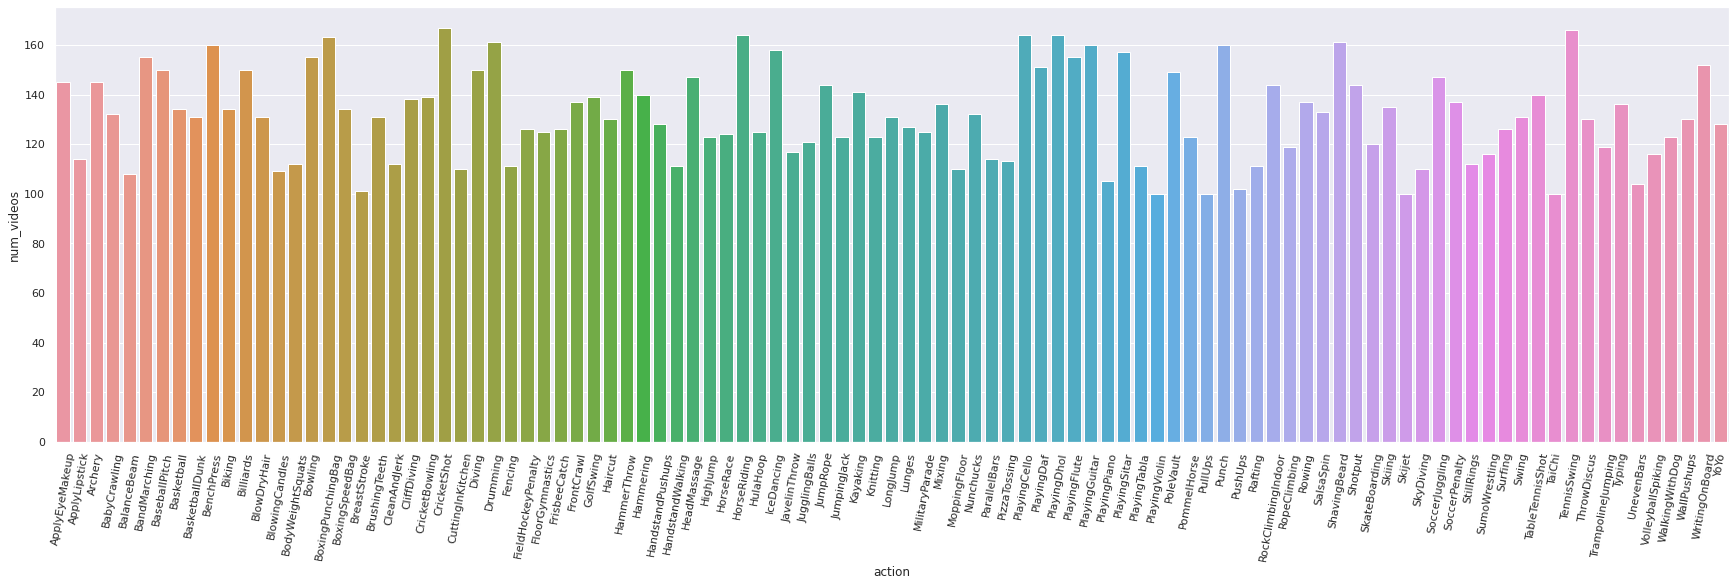

In [ ]:
f, axes = plt.subplots(1, 1)
sns.set(rc={'figure.figsize':(30, 8)})
stats_chart = sns.barplot(x=df['action'], y=df['num_videos'])
stats_chart.set_xticklabels(stats_chart.get_xticklabels(), rotation=80)
f.savefig('stats_num_videos.png')
plt.show()

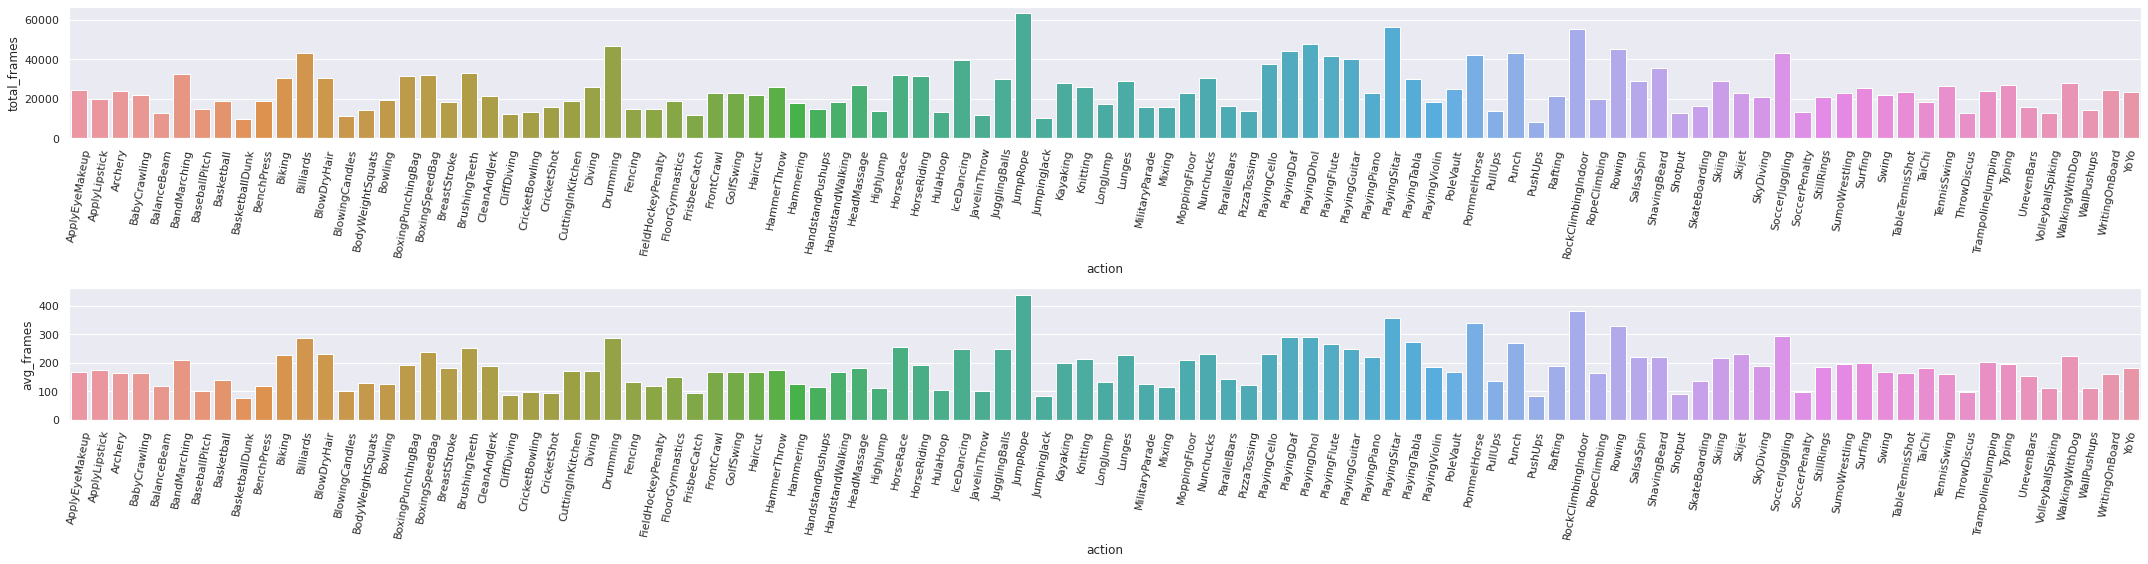

In [ ]:
f, axes = plt.subplots(2, 1)
sns.set(rc={'figure.figsize':(30, 10)})
stats_chart = sns.barplot(x='action', y='total_frames', data=df, ax=axes[0])
stats_chart.set_xticklabels(stats_chart.get_xticklabels(), rotation=80)
stats_chart = sns.barplot(x='action', y='avg_frames', data=df, ax=axes[1])
stats_chart.set_xticklabels(stats_chart.get_xticklabels(), rotation=80)
f.tight_layout()
f.savefig('stats_num_frames.png')
plt.show()

In [ ]:
dimensions = get_frame_dimension_stat(dataset_path)

next video with non-standard resolution: /content/UCF-101/PommelHorse/v_PommelHorse_g05_c01.avi
next video with non-standard resolution: /content/UCF-101/PommelHorse/v_PommelHorse_g05_c04.avi
next video with non-standard resolution: /content/UCF-101/PommelHorse/v_PommelHorse_g05_c03.avi
next video with non-standard resolution: /content/UCF-101/PommelHorse/v_PommelHorse_g05_c02.avi


In [ ]:
print(dimensions)

{(320.0, 240.0): 13316, (400.0, 226.0): 4}


In [ ]:
print(f"Total number of frames: {sum(df['total_frames'])}")

Total number of frames: 2484111.0


In [ ]:
# for dir in os.listdir('UCF101/UCF-101'):
#     dir_path = os.path.join('/content/UCF101/UCF-101', dir)
#     for file in os.listdir(dir_path):
#         os.remove(os.path.join(dir_path, file))
#     os.rmdir(dir_path)

In [ ]:
!git clone https://github.com/saimj7/Video-Classification-in-Real-Time.git

Cloning into 'Video-Classification-in-Real-Time'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 92 (delta 38), reused 58 (delta 14), pack-reused 0
Unpacking objects: 100% (92/92), done.


In [ ]:
# To check whether GPU is available
from tensorflow.python.client import device_lib
from warnings import filterwarnings
filterwarnings('ignore')

print(device_lib.list_local_devices()) # list of DeviceAttributes

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4378430513730659484
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8233983838263093495
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 16707959667367791385
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14640891840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1950826420082591036
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [ ]:
import pandas as pd
import numpy as np
import os, time, cv2, tqdm, datetime
import matplotlib.pyplot as plt
from tqdm import tqdm

from warnings import filterwarnings
filterwarnings('ignore')

SIZE = (224,224)
POSITIVES_PATH_TRAIN = 'data/Train/Class1/'
NEGATIVES_PATH_TRAIN = 'data/Train/Class2/'

POSITIVES_PATH_VALID = 'data/Val/Class1/'
NEGATIVES_PATH_VALID = 'data/Val/Class2/'

# POSITIVES_PATH_TEST = 
# NEGATIVES_PATH_TEST =


NameError: ignored

In [ ]:
!git clone https://github.com/anujshah1003/custom_data_generator.git

Cloning into 'custom_data_generator'...
remote: Enumerating objects: 576, done.
remote: Counting objects: 100% (576/576), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 576 (delta 443), reused 522 (delta 409), pack-reused 0
Receiving objects: 100% (576/576), 2.63 MiB | 16.44 MiB/s, done.
Resolving deltas: 100% (443/443), done.


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np

from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D)
from keras.layers.advanced_activations import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split

from data_gen import ActionDataGenerator
from config import Config

ModuleNotFoundError: ignored

In [ ]:
!pip install opencv-python

In [ ]:
!pip install hydratk-ext-datagen

     |████████████████████████████████| 174kB 3.4MB/s 
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [ ]:
!pip install keras_frcnn

ERROR: Could not find a version that satisfies the requirement keras_frcnn (from versions: none)
ERROR: No matching distribution found for keras_frcnn


In [ ]:
python train.py [-h] [--name NAME] [--data DATA] [--batch-size BATCH_SIZE]
                [--frames-cnt FRAMES_CNT] [--model-type MODEL_TYPE] [--bilstm]
                [--cnn-model CNN_MODEL] [--epochs EPOCHS]
                [--scheduler-patience SCHEDULER_PATIENCE]
                [--scheduler-factor SCHEDULER_FACTOR]
                [--learning-rate LEARNING_RATE] [--n-workers N_WORKERS]
                [--gpu] [--predict] [--continue-training] [--in-memory]
                [--stride STRIDE] [--reload-interval RELOAD_INTERVAL]


SyntaxError: ignored